<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : P43 - Introduction of Dimension Reduction

#### Name: 

#### IC Number:

#### Date :

#### Introduction : 



#### Conclusion :






# Dimension Reduction 

## Introduction

We produce a large amount of data every day. In reality, 90 % of the world 's data have been generated in the past 3-4 years! The figures are very impressive. Below are just some examples of the type of data collected:

1.Facebook gathers information on what you want, share it, post it, places you frequent, restaurants you like, etc.

2.You gather many personal details about your smartphone apps

3.Amazon gathers data on your website on what you order, view, select, etc.

4.Casinos keep track of any step made by every customer

As data generation and processing continue to increase, it becomes more and more difficult to 
interpret it and draw inferences. Some of the most common ways to imagine is by using maps. 
Suppose we've got two variables, age and height. We can use a dispersion or a line plot between age and height and easily visualize its relation, as can be seen in Figure 1 below

<a href="https://imgur.com/REfND9R"><img src="https://i.imgur.com/REfND9R.png" title="source: imgur.com" /></a>

Consider a situation where you have 100 variables. If you were to plot all the permutations of variables you will end up with 100(100-1)/2 or 5000 plots? Not all of these plots are useful. As such, it might be better to select a subset of these variables which captures as much information as the original set of variables.

Let's consider a simple example. Consider Figure 2 below. It plots weight of similar objects in kilogrammes and pounds. (We know that 1 KG = 2.2 Pounds, so there's a linear relationship there)

<a href="https://imgur.com/d4xtMro"><img src="https://i.imgur.com/d4xtMro.png" title="source: imgur.com" /></a>

Actually weight in Kilo and Pounds carry the same meaning (mass). Why not use one variable only? Let's convert from a 2-dimensional data (X1 and X2) to a 1-dimensional data (Y1), as shown in Figure 3

<a href="https://imgur.com/aOXNdh7"><img src="https://i.imgur.com/aOXNdh7.png" title="source: imgur.com" /></a>

In the same manner, we can reduce p dimensions of data into a subset of k dimensions, where k<<p.  This is called **dimensionionality reduction**.

## Importance of dimensionality reduction

These are the key benefits of applying dimensionality reduction to a dataset:

1. Storage space savings, as the number of columns and dimensions comes down
2. Faster computation/training time
3. Addresses multicollinearity. For example, you have two variables ‚Äì ‚Äòtime spent on treadmill in minutes‚Äô and ‚Äòcalories burnt‚Äô. These variables are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require
4. Simplifies data visualization. None of us can imagine an image that is beyond 3-dimension. Thus, dimensionality reduction to 2-dimension or 3-dimension helps with observation of patterns in the data.

## Commonly used Dimensionality Reduction Techniques

Dimensionality Reduction (DR) can be performed usint two ways:

1. Keep the most relevant variables only (feature selection - this can be done as part of a data mining pipeline)
2. Find a smaller set of new variables , each being a combination of the input variables, containing information that is representative of the same information as the input variables (this is known as dimensionality reduction)

### Before Dimension Reduction

         X1        X2
0 -1.174787 -1.404131
1 -1.374449 -1.294660
2 -2.316007 -2.166109
3  0.947847  1.460480
4  1.762375  1.640622
(200, 2)


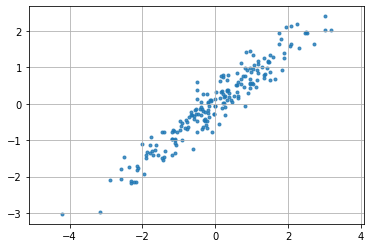

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Create Data
rng = np.random.RandomState(8)
data = np.dot(rng.rand(2,2),rng.randn(2,200)).T
df = pd.DataFrame({'X1':data[:,0],'X2':data[:,1]})
 
print(df.head())
print(df.shape)
plt.scatter(df['X1'],df['X2'],alpha = 0.8 ,marker = '.')
plt.axis('equal')
plt.grid()

### After Dimension Reduction

[2.79699086]
[[-0.7788006  -0.62727158]]
1
orifinal shape: (200, 2)
transformed shape (200, 1)
[[ 1.77885258]
 [ 1.8656813 ]
 [ 3.14560277]
 [-1.67114513]
 [-2.41849842]]
--------------------


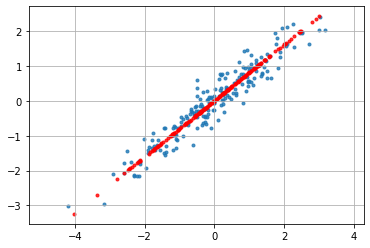

In [28]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 1)
pca.fit(df)
# n_components:downgradr to 1 dimension
 
print(pca.explained_variance_)
print(pca.components_)
print(pca.n_components_)
 
# downgrade PCAÔºöa1 = 0.7788006 * X1 +  0.627271588 *X2
x_pca = pca.transform(df)#data conversion
x_new = pca.inverse_transform(x_pca) #convert to raw data
print('orifinal shape:',df.shape)
print('transformed shape',x_pca.shape)
print(x_pca[:5])
print('--------------------')
 
plt.scatter(df['X1'],df['X2'],alpha = 0.8,marker = '.')
plt.scatter(x_new[:,0],x_new[:,1],alpha = 0.8,marker = '.',color = 'r')
plt.axis('equal')
plt.grid()

### Preprocessing 

We begin our exploration of DR techniques by performing preprocessing first. These preprocessing steps will help the DR technique process to be more useful.

The preprocessing steps include:

1. Missing Value Ratio
2. Low Variance Filter
3. High Correlation Filter





### Missing Value Ratio

Let's see the dataset on hand has some missing values. We can either impute the values or drop the variables entirely. We can set a threshold value to determine whether the variable should be drop or not. Observe the following code

In [29]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read the data
train=pd.read_csv("train_DR.csv")
# checking the percentage of missing values in each variable
train.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

What can we observe from the outcome of the code? Only two variables have missing values. What are our options here? We can consider imputation , if the missing value is between 5-10% (https://www.sciencedirect.com/science/article/pii/S0895435618308710), any value greater than that would suggest that dropping that variable is more statistically sound. Let's relax this approach and implement an approach where any variable with more than 20% missing value is removed.

In [30]:
# saving missing values in a variable
a = train.isnull().sum()/len(train)*100
# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])
#print out variable
variable

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

### Low variance filter
Variables or columns with the same values exhibit zero variance. Zero variance variables have no modellingaccept power and will not impact the target variable in any model. At this stage, it would be useful to calculate the variance of each variable in our dataset. Variables with low variance will be dropped. A good guide on what is a good threshold for removal of variance is shown here https://datascience.stackexchange.com/questions/31453/how-to-decide-what-threshold-to-use-for-removing-low-variance-features .

In [31]:
#For argument's sake, let's perform imputation on the variables with missing value
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
train.isnull().sum()/len(train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [32]:
#Let's calculate the variance
train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

Item visibility has variance which is close to zero. Let's filter it out using the code below.

In [33]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count   8523.00000      8523.000000  8523.000000                8523.000000   
mean      12.81342         0.066132   140.992782                1997.831867   
std        4.22724         0.051598    62.275067                   8.371760   
min        4.55500         0.000000    31.290000                1985.000000   
25%        9.31000         0.026989    93.826500                1987.000000   
50%       12.60000         0.053931   143.012800                1999.000000   
75%       16.00000         0.094585   185.643700                2004.000000   
max       21.35000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [34]:
numeric = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',]]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
len(var)
var[1]
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
      variable.append(numeric[i])
variable

['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']

### High correlation filter
A strong correlation between two variables leads to similar patterns and similar knowledge. This can significantly reduce the performance of certain models (for example, linear and logistic regression models). We can measure the association between numerically independent numerical variables. If the correlation coefficient passes through a certain threshold value, one of the variables can be lowered (the decrease of a variable is very subjective and often with the domain in mind).
**Generally, variables with high correlation with the target variable is desirable (correlation is not causation!)**
Of course, sometimes, when we rescale the date (use a log scale for example) , the correlation changes, if you use a linear correlation (a good discussion is found here https://stats.stackexchange.com/questions/127121/do-logs-modify-the-correlation-between-two-variables)
Let's check the correlation calculation for our data in the next code block. The target variable (Item_Outlet_Sales) is dropped and the resultant data is saved as a new dataframe

In [35]:
df=train.drop('Item_Outlet_Sales', 1)
df.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014168  0.024951   
Item_Visibility              -0.014168         1.000000 -0.001315   
Item_MRP                      0.024951        -0.001315  1.000000   
Outlet_Establishment_Year     0.007739        -0.074834  0.005020   

                           Outlet_Establishment_Year  
Item_Weight                                 0.007739  
Item_Visibility                            -0.074834  
Item_MRP                                    0.005020  
Outlet_Establishment_Year                   1.000000

Wonderful, we don‚Äôt have any variables with a high correlation in our dataset. Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.

## Random Forest
Random Forest is one of the most commonly used feature selection algorithms. It comes with built-in features, so you don't have to plan this separately. This helps us to pick a smaller function subset.

We have to convert the data to numerical form using one hot encoding, since Random Forest only takes numerical inputs. Let's also delete the ID variables (Item Identifier and Outlet Identifier) since these are special numbers which currently have no important meaning for us.

In [36]:
from sklearn.ensemble import RandomForestRegressor
df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.Item_Outlet_Sales)

RandomForestRegressor(max_depth=10, random_state=1)

Now that the model is fitted, let's plot the feature importance graph.

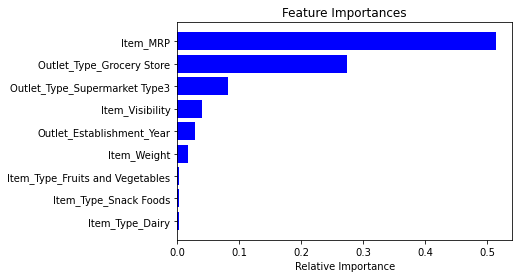

In [37]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From the graph above, we can perform feature selection in order to achieve **dimensionality reduction**. Alternatively, we can use **SelectFromModel method of sklearn** to do so. It selects the features based on the importance of their weights.

In [38]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df, train.Item_Outlet_Sales)
X_transform = feature.transform(df)
n_features = feature.transform(df).shape[1]
n_features

5

### Backward Feature Elimination (e.g. Recursive Feature Elimination)

Follow the below steps to understand and use the ‚ÄòBackward Feature Elimination‚Äô technique:

1. We first take all the n variables present in our dataset and train the model using them
2. We then calculate the performance of the model
3. Now, we compute the performance of the model after eliminating each variable (n times), i.e., we drop one variable every time and train the model on the remaining n-1 variables
4. We identify the variable whose removal has produced the smallest (or no) change in the performance of the model, and then drop that variable
5. Repeat this process until no variable can be dropped
This method can be used when building Linear Regression or Logistic Regression models. Let‚Äôs look at it‚Äôs Python implementation:

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
#RFE is a reference to Recursive Feature Elimination
rfe = RFE(lreg, 10)
rfe = rfe.fit_transform(df, train.Item_Outlet_Sales)

D:\Anaconda3\envs\python-dscourse\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [40]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [41]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -27.094 (2.681)


### Forward Feature Selection 
This is the opposite process of the Backward Feature Elimination we saw above. Instead of eliminating features, we try to find the best features which improve the performance of the model. This technique works as follows:

1. We start with a single feature. Essentially, we train the model n number of times using each feature separately
2. The variable giving the best performance is selected as the starting variable
3. Then we repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained
4. We repeat this process until no significant improvement is seen in the model‚Äôs performance

In [42]:
from sklearn.feature_selection import f_regression
ffs = f_regression(df,train.Item_Outlet_Sales )

In [43]:
variable = [ ]
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=10:
       variable.append(df.columns[i])
variable

['Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Type_Baking Goods',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2']

NOTE : Both Backward Feature Elimination and Forward Feature Selection are time consuming and computationally expensive.They are practically only used on datasets that have a small number of input variables.

### Factor Analysis

Variables are grouped into their correlations in factor analysis technique , i.e., all variables in a specific group have a high correlation between them but a low correlation with variables of another group(s). Each group is referred to here as a factor. These variables are small compared to the original data measurements. These variables are difficult to detect, however.

Let's read all the pictures in the train folder first:

In [44]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
images = [cv2.imread(file) for file in glob('train/*.png')]

Convert the images to a numpy array so that mathematical operations can be performed and so that the image can be plotted

In [45]:
images = np.array(images)
images.shape

(60000, 28, 28, 3)

The images are 3-dimensional in nature. Let's flatten it to a 1-dimensional object as in input for later parts.

In [46]:
image = []
for i in range(0,60000):
    img = images[i].flatten()
    image.append(img)
image = np.array(image)

Now, let's create a dataframe containing the pixel values of every individual pixedl present in each image, and their label. Their labels is provided in the train.csv file.

In [47]:
train = pd.read_csv("train.csv")     # Give the complete path of your train.csv file
feat_cols = [ 'pixel'+str(i) for i in range(image.shape[1]) ]
df = pd.DataFrame(image,columns=feat_cols)
df['label'] = train['label']

Factor analysis is next used to decompose the dataset

In [48]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(df[feat_cols].values)

n_components will decide the number of factors in the transformed data. Let's visualize the data.

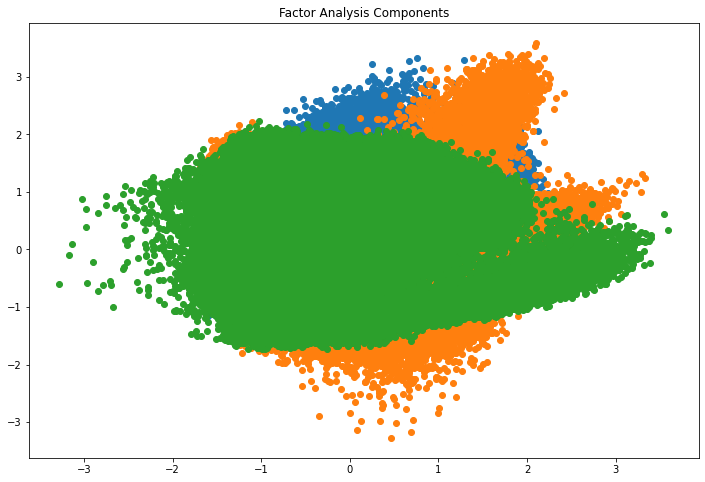

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

Here, the x-axis and y-axis represent the values of decomposed factors. As I mentioned earlier, it is hard to observe these factors individually but we have been able to reduce the dimensions of our data successfull

### Principal Component Analysis

PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. These newly extracted variables are called Principal Components. For your quick reference, below are some of the key points you should know about PCA before proceeding further:

1. A principal component is a linear combination of the original variables
2. Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset
3. Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component
4. Third principal component tries to explain the variance which is not explained by the first two principal components and so on
Before moving further, we‚Äôll randomly plot some of the images from our dataset:

<Figure size 432x288 with 0 Axes>

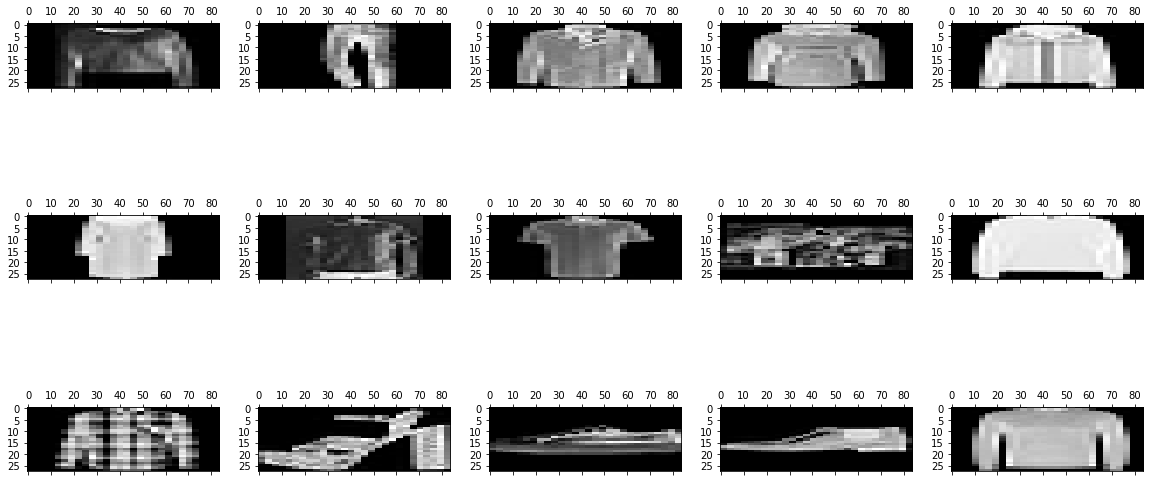

In [50]:
rndperm = np.random.permutation(df.shape[0])
plt.gray()
fig = plt.figure(figsize=(20,10))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28*3)).astype(float))

Let's apply PCA and transform the image dataset

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feat_cols].values)

In this case, n_components will decide the number of principal components in the transformed data. Let‚Äôs visualize how much variance has been explained using these 4 components. We will use explained_variance_ratio_ to calculate the same.

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

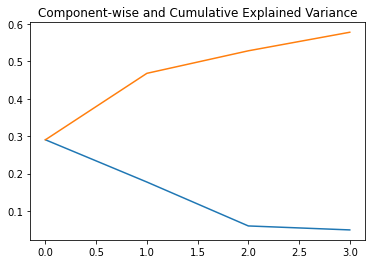

In [52]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In the above graph, the blue line represents component-wise explained variance while the orange line represents the cumulative explained variance. We are able to explain around 60% variance in the dataset using just four components. Let us now try to visualize each of these decomposed components:

Text(0.5, 0.98, '4-Component PCA')

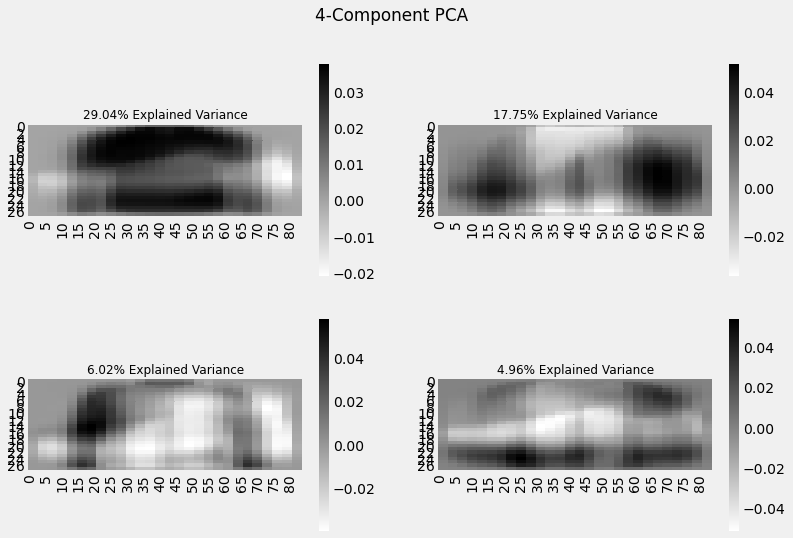

In [53]:
import seaborn as sns
plt.style.use('fivethirtyeight')
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.heatmap(pca.components_[0, :].reshape(28, 84), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 84), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 84), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 84), ax=axarr[1][1], cmap='gray_r')
axarr[0][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
fontsize=12
)
axarr[0][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
fontsize=12
)
axarr[1][0].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
fontsize=12
)
axarr[1][1].set_title(
"{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

Each additional dimension we add to the PCA technique captures less and less of the variance in the model. The first component is the most important one, followed by the second, then the third, and so on.

We can also use Singular Value Decomposition (SVD) to decompose our original dataset into its constituents, resulting in dimensionality reduction.

SVD decomposes the original variables into three constituent matrices. It is essentially used to remove redundant features from the dataset. It uses the concept of Eigenvalues and Eigenvectors to determine those three matrices. We will not go into the mathematics of it due to the scope of this article, but let‚Äôs stick to our plan, i.e. reducing the dimensions in our dataset.

Let‚Äôs implement SVD and decompose our original variables:

In [54]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df[feat_cols].values)

Let us visualize the transformed variables by plotting the first two principal components:

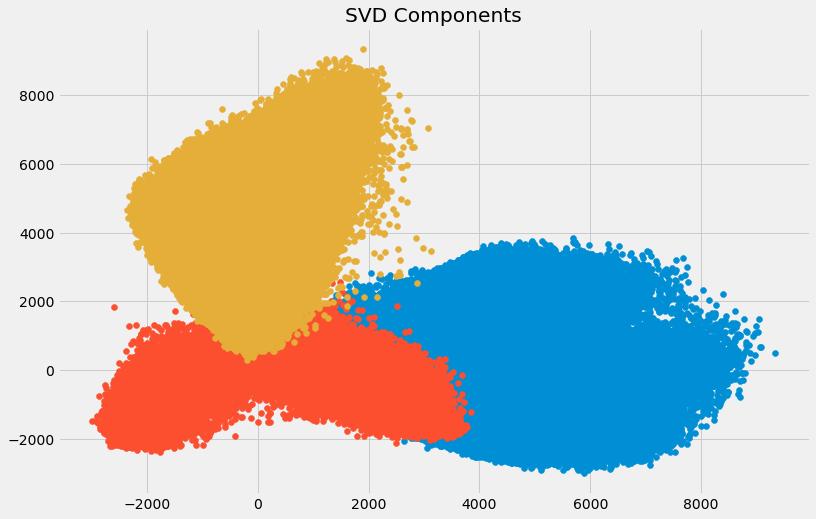

In [55]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

We continue our discussion on dimension reduction, this time focusing on **Independent Component Analysis** and **t-sne**. This section is a bit more wordy so be prepared!

## Independent Component Analysis (ICA)

Independent Component Analysis (ICA) is based on information-theory and is also one of the most widely used dimensionality reduction techniques. The major difference between PCA and ICA is that PCA looks for uncorrelated factors while ICA looks for independent factors.

If two variables are uncorrelated, it means there is no linear relation between them. If they are independent, it means they are not dependent on other variables. For example, the age of a person is independent of what that person eats, or how much television he/she watches.

**This algorithm assumes that the given variables are linear mixtures of some unknown latent variables. It also assumes that these latent variables are mutually independent**, i.e., they are not dependent on other variables and hence they are called the independent components of the observed data.

Let's compare PCA and ICA visually side by side. A is representing PCA while B represents ICA results on the same dataset in Figure 1

<a href="https://imgur.com/BySJBjx"><img src="https://i.imgur.com/BySJBjx.png" title="source: imgur.com" /></a>

The equation of PCA is x = Wœá.

Here,

x is the observations
W is the mixing matrix
œá is the source or the independent components
Now we have to find an un-mixing matrix such that the components become as independent as possible. Most common method to measure independence of components is Non-Gaussianity:

As per the central limit theorem, distribution of the sum of independent components tends to be normally distributed (Gaussian).

The gaussian shape is shown in Figure 2


<a href="https://imgur.com/gbLZlWB"><img src="https://i.imgur.com/gbLZlWB.png" title="source: imgur.com" /></a>

So we can look for the transformations that maximize the kurtosis of each component of the independent components. Kurtosis is the third order moment of the distribution. To learn more about kurtosis, head over here.

Maximizing the kurtosis will make the distribution non-gaussian and hence we will get independent components, as shown in Figure 3.

<a href="https://imgur.com/q3Hi7vK"><img src="https://i.imgur.com/q3Hi7vK.png" title="source: imgur.com" /></a>

Let's implement ICA 

In [56]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(df[feat_cols].values)

Here, n_components will decide the number of components in the transformed data. We have transformed the data into 3 components using ICA. Let‚Äôs visualize how well it has transformed the data:

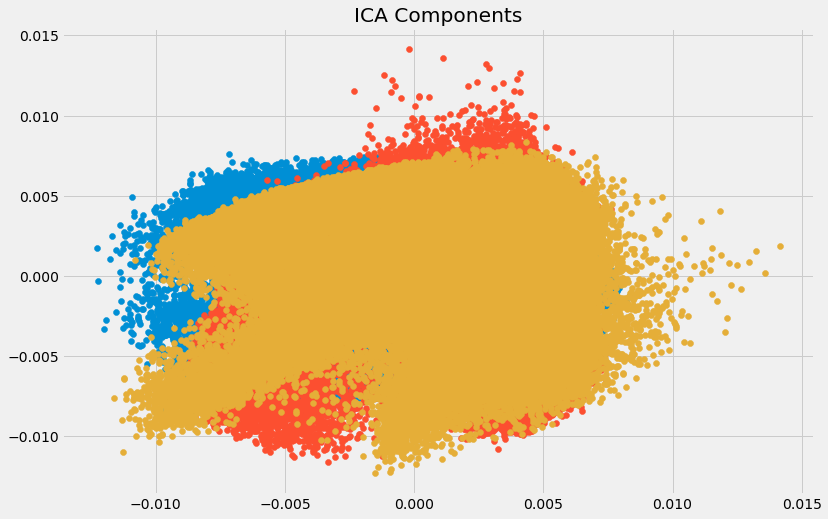

In [57]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,1], X[:,2])
plt.scatter(X[:,2], X[:,0])

The data has been separated into different independent components which can be seen very clearly in the above image. X-axis and Y-axis represent the value of decomposed independent components.

Now we shall look at some of the methods which reduce the dimensions of the data using projection techniques.

To start off, we need to understand what projection is. Suppose we have two vectors, vector a and vector b, as shown in Figure 4 below:

<a href="https://imgur.com/Qxg5SVG"><img src="https://i.imgur.com/Qxg5SVG.png" title="source: imgur.com" /></a>

We want to the projection of a on b. Let the angle between a and b be theta. The projection a1 will look like Figure 5

<a href="https://imgur.com/Elogq8Q"><img src="https://i.imgur.com/Elogq8Q.png" title="source: imgur.com" /></a>

a1 is the vector parallel to b. The projection of vector a on vector b is shown in the equation in Figure 6

<a href="https://imgur.com/VttQluf"><img src="https://i.imgur.com/VttQluf.png" title="source: imgur.com" /></a>

Here,

a1 = projection of a onto b
bÃÇ = unit vector in the direction of b
By projecting one vector onto the other, dimensionality can be reduced.

### t-distributed Stochastic Neighbor Embedding (t-SNE)
So far we have learned that PCA is a good choice for dimensionality reduction and visualization for datasets with a large number of variables. But what if we could use something more advanced? What if we can easily search for patterns in a non-linear way? t-SNE is one such technique. There are mainly two types of approaches we can use to map the data points:

1. Local approaches :  They maps nearby points on the manifold to nearby points in the low dimensional representation.
2. Global approaches : They attempt to preserve geometry at all scales, i.e. mapping nearby points on manifold to nearby points in low dimensional representation as well as far away points to far away points.

t-SNE is one of the few algorithms which is capable of retaining both local and global structure of the data at the same time

It calculates the probability similarity of points in high dimensional space as well as in low dimensional space

High-dimensional Euclidean distances between data points are converted into conditional probabilities that represent similarities as shown in Figure 7:

<a href="https://imgur.com/iOdjWwt"><img src="https://i.imgur.com/iOdjWwt.png" title="source: imgur.com" /></a>

xi and xj are data points, ||xi-xj|| represents the Euclidean distance between these data points, and ùõîi is the variance of data points in high dimensional space
For the low-dimensional data points yi and yj corresponding to the high-dimensional data points xi and xj, it is possible to compute a similar conditional probability using the equation shown in Figure 8:


<a href="https://imgur.com/jNd6xof"><img src="https://i.imgur.com/jNd6xof.png" title="source: imgur.com" /></a>

where ||yi-yj|| represents the Euclidean distance between yi and yj
After calculating both the probabilities, it minimizes the difference between both the probabilities.

The code for t-SNE is shown below

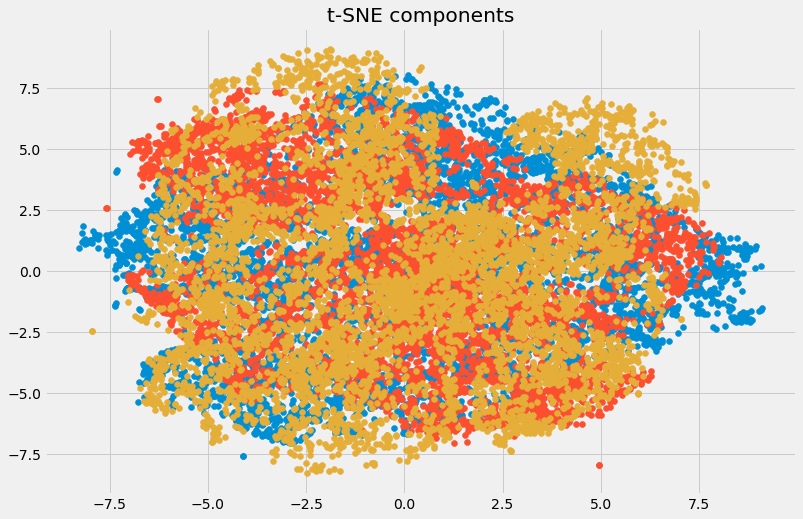

In [58]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3, n_iter=300).fit_transform(df[feat_cols][:6000].values)
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(tsne[:,0], tsne[:,1])
plt.scatter(tsne[:,1], tsne[:,2])
plt.scatter(tsne[:,2], tsne[:,0])